In [148]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import keras
import tensorflow as tf


In [149]:
os.chdir('Y:\\stocks_pj\\PRJ Stock Price Prediction\\')

In [150]:
df =pd.read_csv("prices.csv", header=0)
display (df)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [151]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [152]:
display (df.describe())

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [153]:
display (df.isnull().sum())


date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [154]:
display (df.date.unique())


array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [155]:
display (pd.DataFrame(df.date.unique()))


,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [156]:
display (df.duplicated().sum())


0

In [157]:
comp_info = pd.read_csv('securities.csv')
display (comp_info)


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [158]:
print (comp_info["Ticker symbol"].nunique())
comp_info.info()
print (comp_info.isnull().sum())


505
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB
Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64


In [159]:
print (comp_info.describe())

                CIK
count  5.050000e+02
mean   7.074490e+05
std    5.144375e+05
min    1.800000e+03
25%    8.631200e+04
50%    8.310010e+05
75%    1.075531e+06
max    1.659166e+06


In [160]:
display(comp_info.loc[comp_info.Security.str.startswith('Acc') , :])


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [161]:
# here we locate Ticker symbol of company with security like Yahoo, Xerox, Adobe etc, then taking their no. of times entry and thier "Ticker symbol"
# In the result, left side 6.181,212 etc the index values corresponds to the selected companies from  comp info 

comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)


6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [162]:
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph



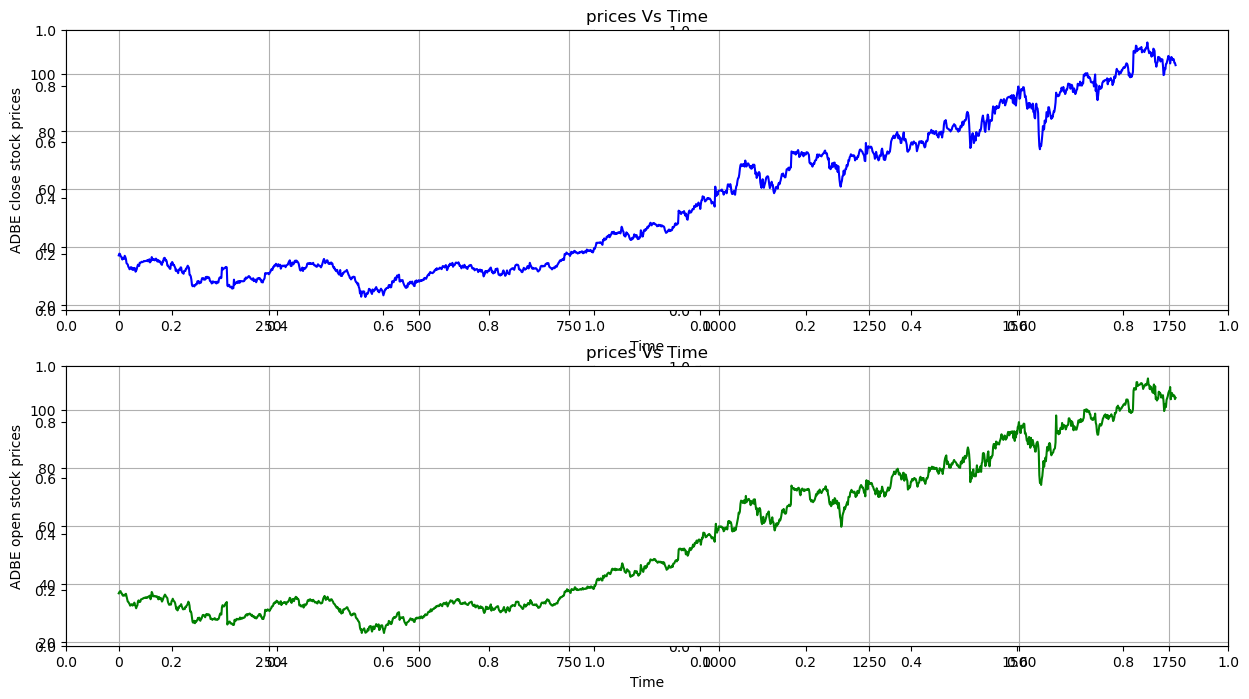

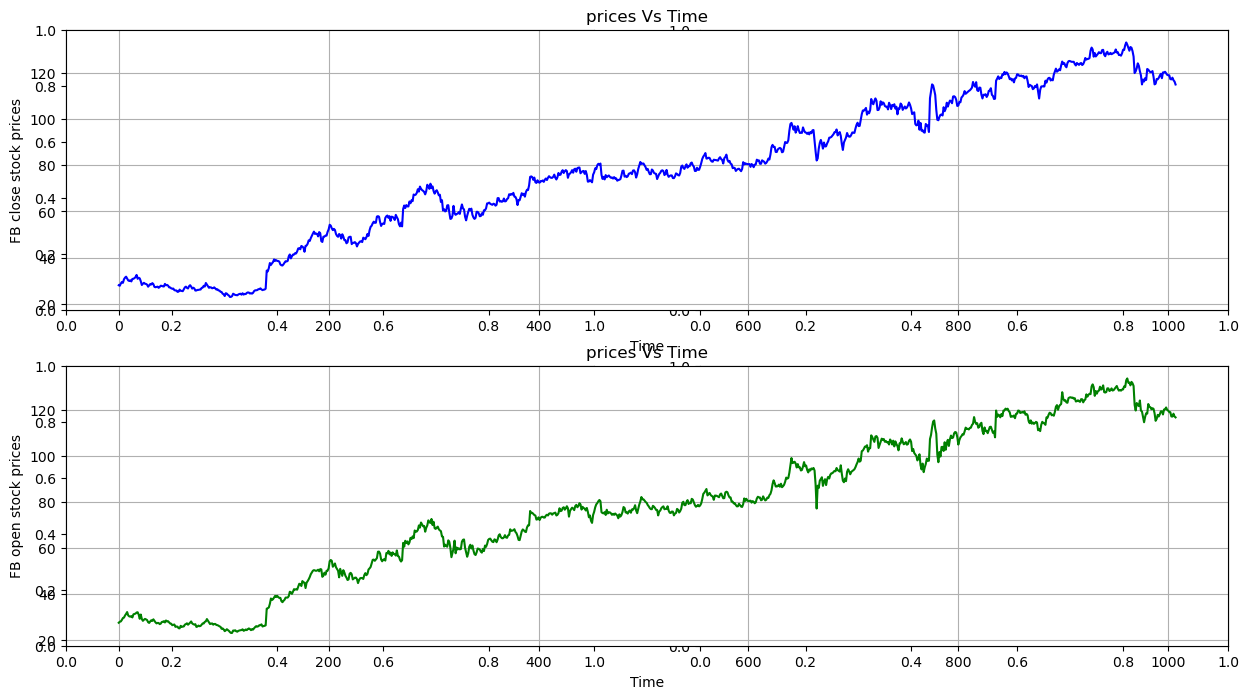

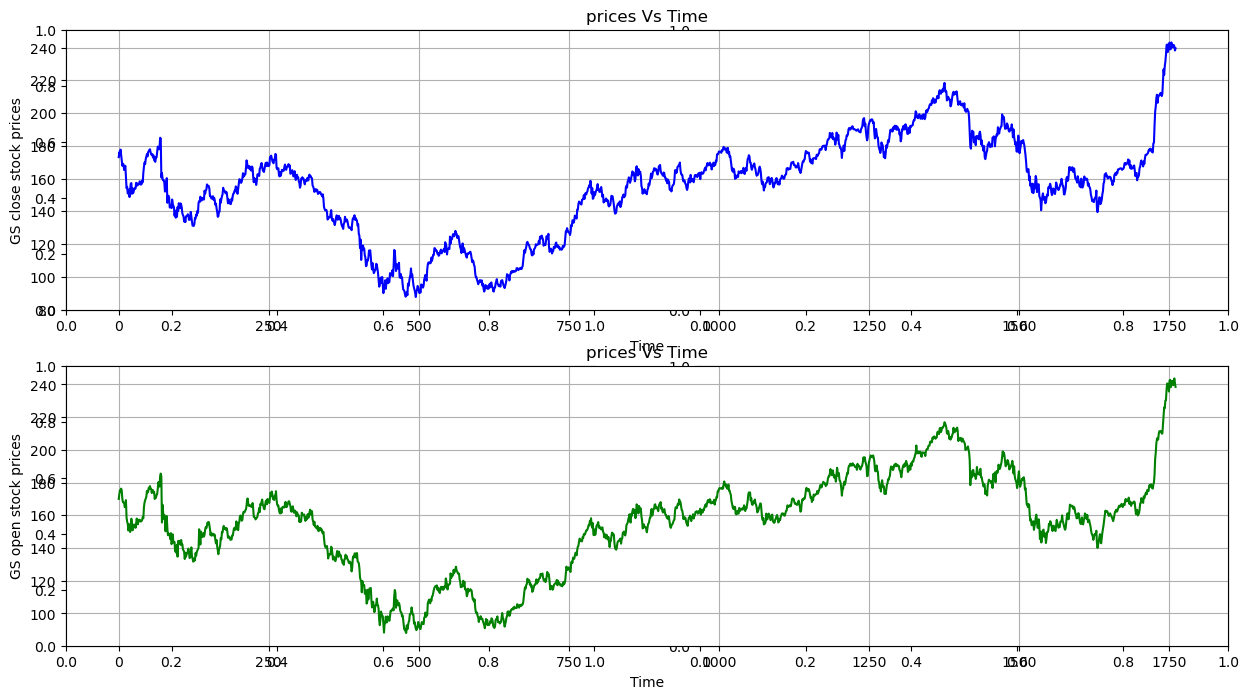

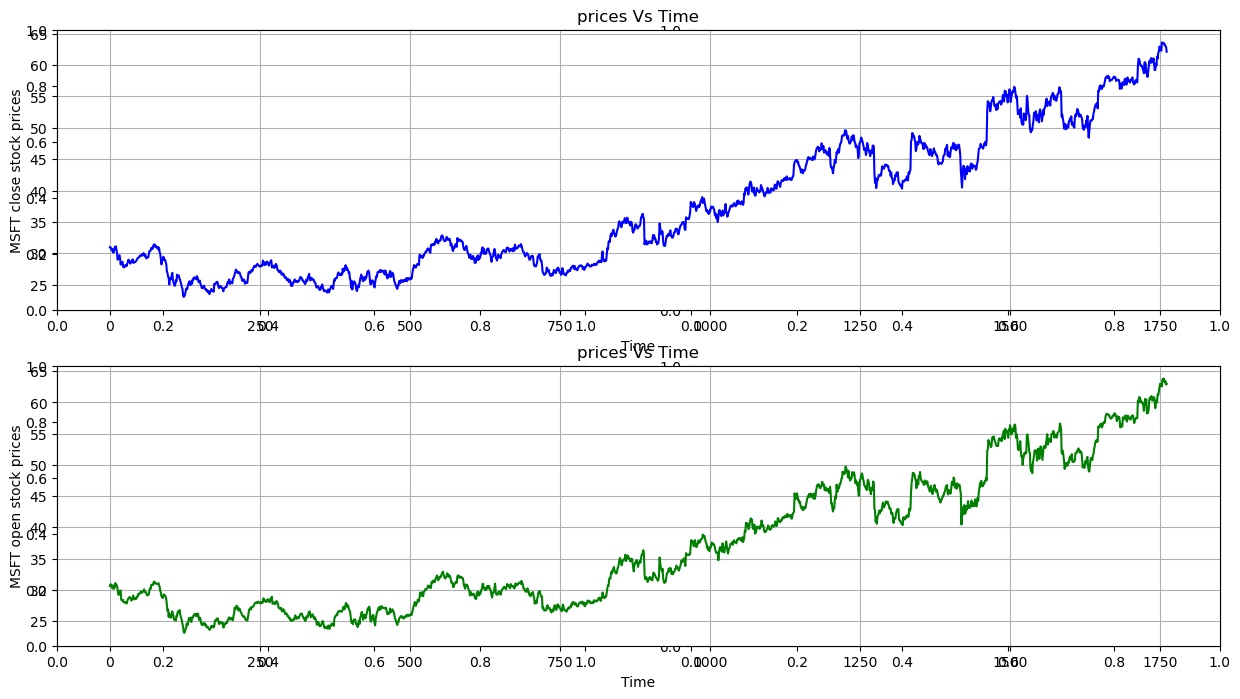

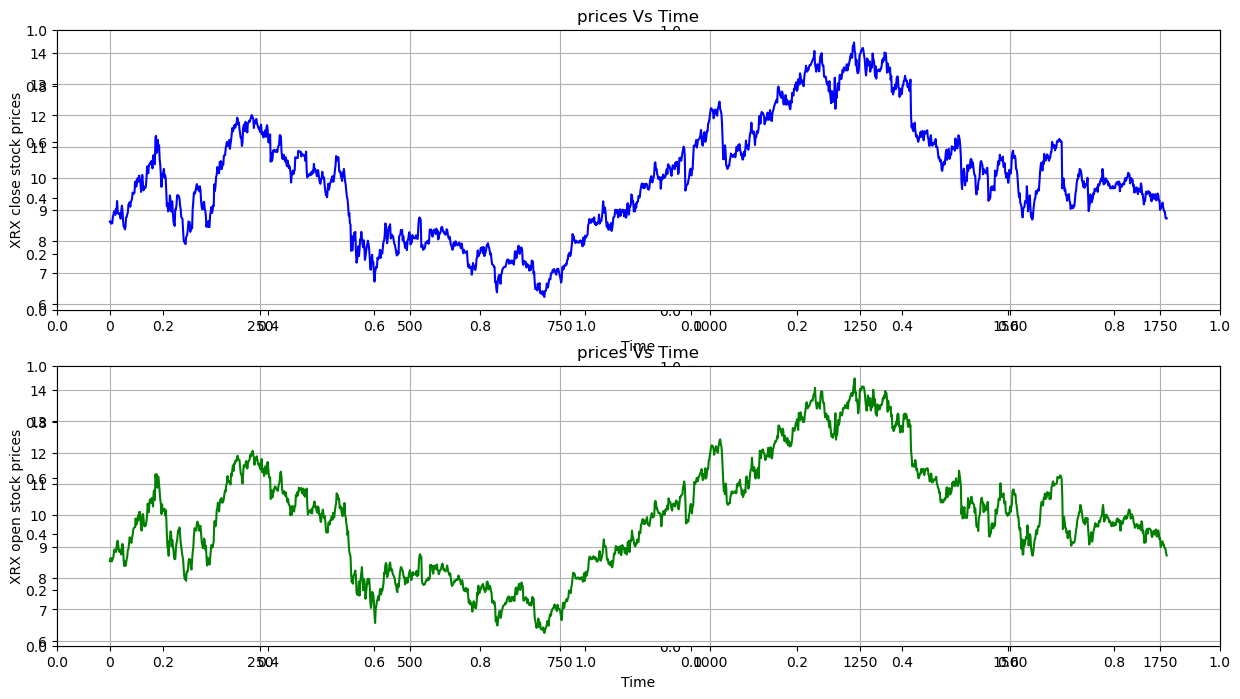

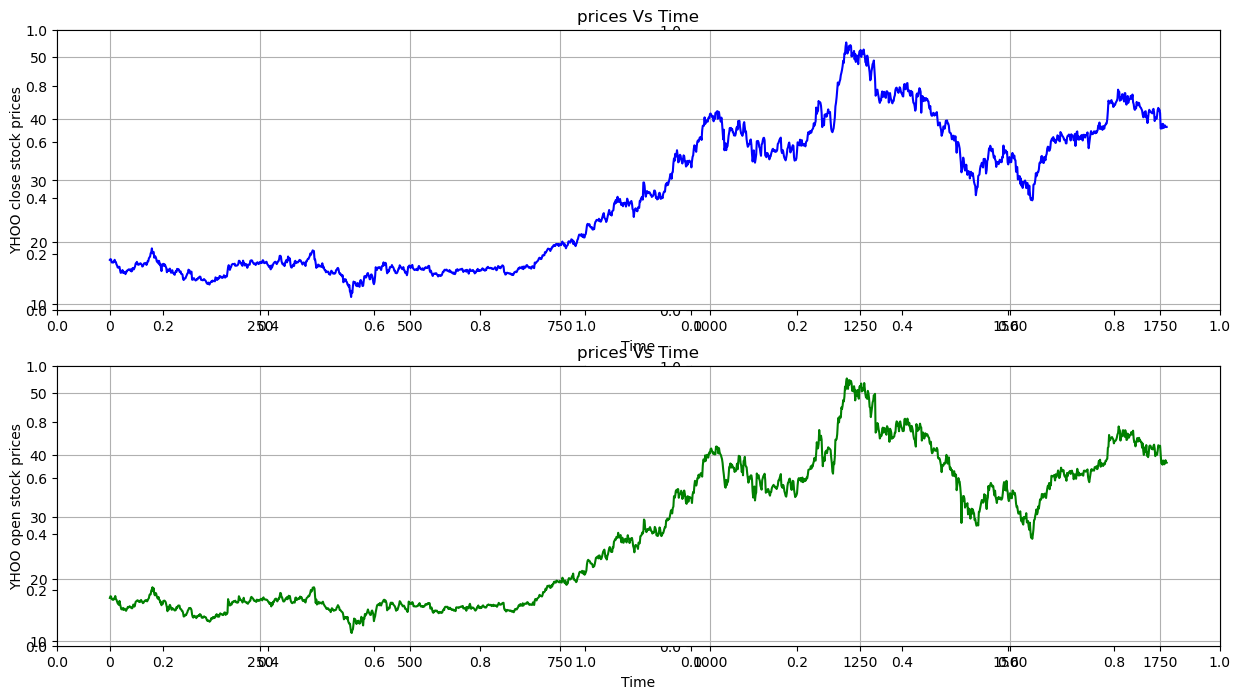

In [163]:
for i in comp_plot:
    plotter(i)


# predictions for Microsoft 

In [164]:
stocks= np.array (df[df.symbol.isin (['MSFT'])].close)
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)



(1762, 1)
[[30.950001]
 [30.959999]
 [30.77    ]
 ...
 [62.990002]
 [62.900002]
 [62.139999]]


# using Min Max Scaler

In [165]:
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)


array([[0.19551837],
       [0.19576457],
       [0.19108594],
       ...,
       [0.98448665],
       [0.98227045],
       [0.96355577]])

Train and splite 80 - 20

In [166]:
#divinding the values of stocks data to train from 0 to 1409 i.e 80% data
#train = stocks[0:train]
#display (train.shape)
#print(train)


In [167]:
#divinding the values of stocks data to test from train ending to stock data ending i.e rest 20% data
test = stocks[len(train) : ]
display(test.shape)
display (test)


(353, 1)

array([[0.59886734],
       [0.57621277],
       [0.5843389 ],
       [0.5840926 ],
       [0.59074121],
       [0.59862104],
       [0.59738982],
       [0.58113769],
       [0.55774441],
       [0.49396702],
       [0.45973899],
       [0.4299434 ],
       [0.48510218],
       [0.51440538],
       [0.51514407],
       [0.50504803],
       [0.46318642],
       [0.50110814],
       [0.50455554],
       [0.48263978],
       [0.51415906],
       [0.49396702],
       [0.49938443],
       [0.50406305],
       [0.49322831],
       [0.51637529],
       [0.5242551 ],
       [0.5230239 ],
       [0.50406305],
       [0.5195765 ],
       [0.51440538],
       [0.51366657],
       [0.51465158],
       [0.51539029],
       [0.49938443],
       [0.50307805],
       [0.52327009],
       [0.53188874],
       [0.55552821],
       [0.58163018],
       [0.58458509],
       [0.58581629],
       [0.60182225],
       [0.59344993],
       [0.59074121],
       [0.58803249],
       [0.58286138],
       [0.590

In [168]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array



In [169]:
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block
n_features = 2
trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)


(1407, 2) (1407,)


In [170]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)


(351, 2) (351,)
(1760, 2) (1760,)


In [171]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)


(1407, 1, 2)

(351, 1, 2)

In [172]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)



(1760, 1, 2)

# Creating the model

In [173]:
import math
from keras.models import Sequential 
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from keras.optimizers import Adam , SGD , RMSprop



In [174]:
filepath="stock_weights1.keras"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta =0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')


In [175]:
model = Sequential()


In [176]:
#This is the input Layer 
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
#This is the output Layer, Output is only one neuron 
model.add(Dense(1))
#for getting the details of our models
print(model.summary())


C:\Users\shera\.conda\envs\face_dect\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 1, 256)         │       199,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,505 (2.83 MB)

 Trainable params: 741,505 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

None


In [177]:
model.compile(loss='mean_squared_error', optimizer=Adam( 0.0005) , metrics = ['mean_squared_error'])

In [178]:
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    


Epoch 1/100
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1757 - mean_squared_error: 0.1757
Epoch 1: val_loss improved from -inf to 0.28723, saving model to stock_weights1.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.1672 - mean_squared_error: 0.1672 - val_loss: 0.2872 - val_mean_squared_error: 0.2872 - learning_rate: 5.0000e-04
Epoch 2/100
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0666 - mean_squared_error: 0.0666 
Epoch 2: val_loss did not improve from 0.28723
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0093 - val_mean_squared_error: 0.0093 - learning_rate: 5.0000e-04
Epoch 3/100
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0194 - mean_squared_error: 0.0194 
Epoch 3: val_loss did not improve from 0.28723
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - learning_rate: 5.0000e-04
Epoch 4/100
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s

In [179]:
test_pred = model.predict(testX)
display (test_pred [:10])



11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step 


array([[0.5087233 ],
       [0.5033443 ],
       [0.5062842 ],
       [0.50871193],
       [0.5141858 ],
       [0.5166663 ],
       [0.51003873],
       [0.49511698],
       [0.46239546],
       [0.42609614]], dtype=float32)

In [180]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])


array([[43.669254],
       [43.450813],
       [43.570198],
       [43.668793],
       [43.891087],
       [43.991817],
       [43.722675],
       [43.1167  ],
       [41.78788 ],
       [40.313763]], dtype=float32)

In [181]:
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])


array([[46.740002],
       [46.73    ],
       [47.      ],
       [47.32    ],
       [47.27    ],
       [46.610001],
       [45.66    ],
       [43.07    ],
       [41.68    ],
       [40.470001]])

In [182]:
from sklearn.metrics import r2_score
print (r2_score(testY,test_pred))


-0.0481014634218242


Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


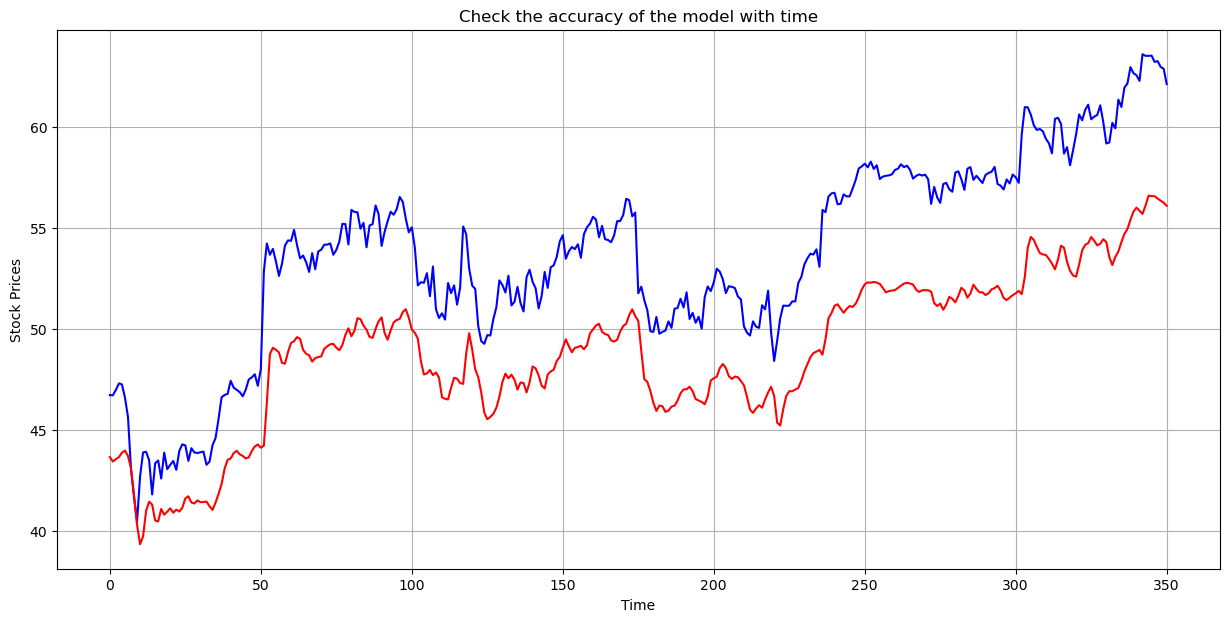

In [183]:
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()


In [184]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Display Accuracy Training Data


0.9255951158220042

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


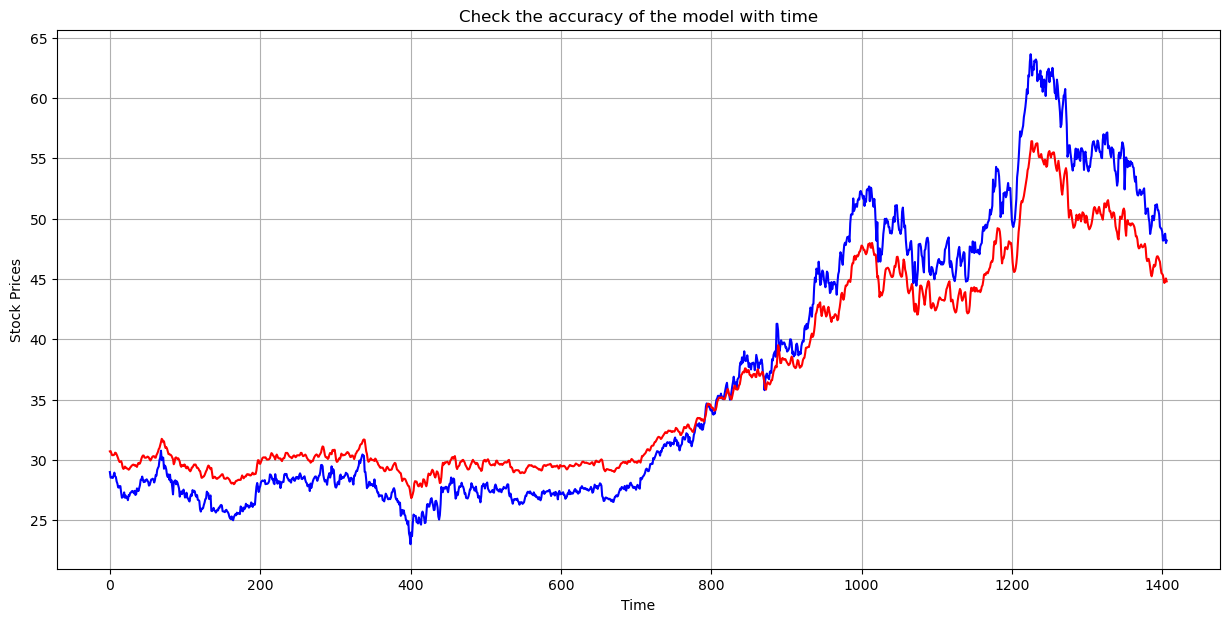

In [185]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [186]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Display Accuracy Training Data


0.9224467794591998

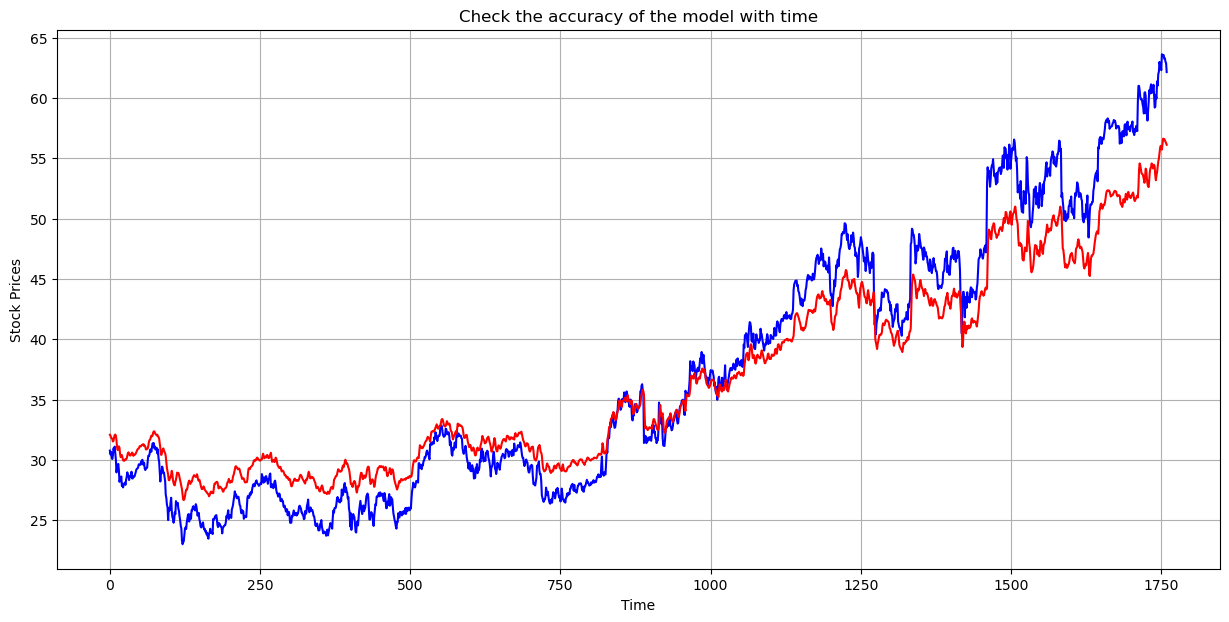

In [187]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [188]:
# Extract the data related to company - YHOO
results= df[df.symbol.isin (['MSFT'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_csv('results.csv')
display(results)


,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,MSFT,30.879999,30.770000,30.520000,31.080000,58182400.0,32.080040
1,2010-01-07,MSFT,30.629999,30.450001,30.190001,30.700001,50559700.0,32.016068
2,2010-01-08,MSFT,30.280001,30.660000,30.240000,30.879999,51197400.0,31.836678
3,2010-01-11,MSFT,30.709999,30.270000,30.120001,30.760000,68754700.0,31.800228
4,2010-01-12,MSFT,30.150000,30.070000,29.910000,30.400000,65912100.0,31.734779
...,...,...,...,...,...,...,...,...
1755,2016-12-23,MSFT,63.450001,63.240002,62.799999,63.540001,12403800.0,56.592709
1756,2016-12-27,MSFT,63.209999,63.279999,63.209999,64.070000,11763200.0,56.472782
1757,2016-12-28,MSFT,63.400002,62.990002,62.830002,63.400002,14653300.0,56.366180
1758,2016-12-29,MSFT,62.860001,62.900002,62.730000,63.200001,10250600.0,56.266182
